# Example for reading fou-file for example Tol
The fou.nc file is read and *variable* is extracted. Next, the mesh data is converted to a raster and saved to a .tiff 

In [1]:
import os
import sys

import matplotlib.pyplot as plt

currentdir = os.path.dirname(os.getcwd())
sys.path.append(currentdir + r"/HydroLogic_Inundation_toolbox")
sys.path.append(currentdir + r"/HydroLogic_Inundation_toolbox/Readers")

from flowmeshreader import load_fou_data, mesh_to_tiff
from plotting import raster_plot_with_context

In [2]:
# set paths
input_file_path = currentdir + r"/HydroLogic_Inundation_toolbox/Data/Tol/input/1PT10_fou.nc"
output_file_path = currentdir + r"/HydroLogic_Inundation_toolbox/Data/Tol/output/fou.tiff"

In [3]:
# raster options
resolution = 10  # m
distance_tol = 36  # m
interpolation = r"nearest"

In [4]:
variable = r"Mesh2d_fourier002_max_depth"

In [5]:
# load mesh coordinates and data from netCDF 
node_data = load_fou_data(input_file_path, variable)

In [6]:
# convert to raster and save as tiff
_, _, grid_data = mesh_to_tiff(
    node_data,
    input_file_path,
    output_file_path,
    resolution,
    distance_tol,
    interpolation=interpolation,
)

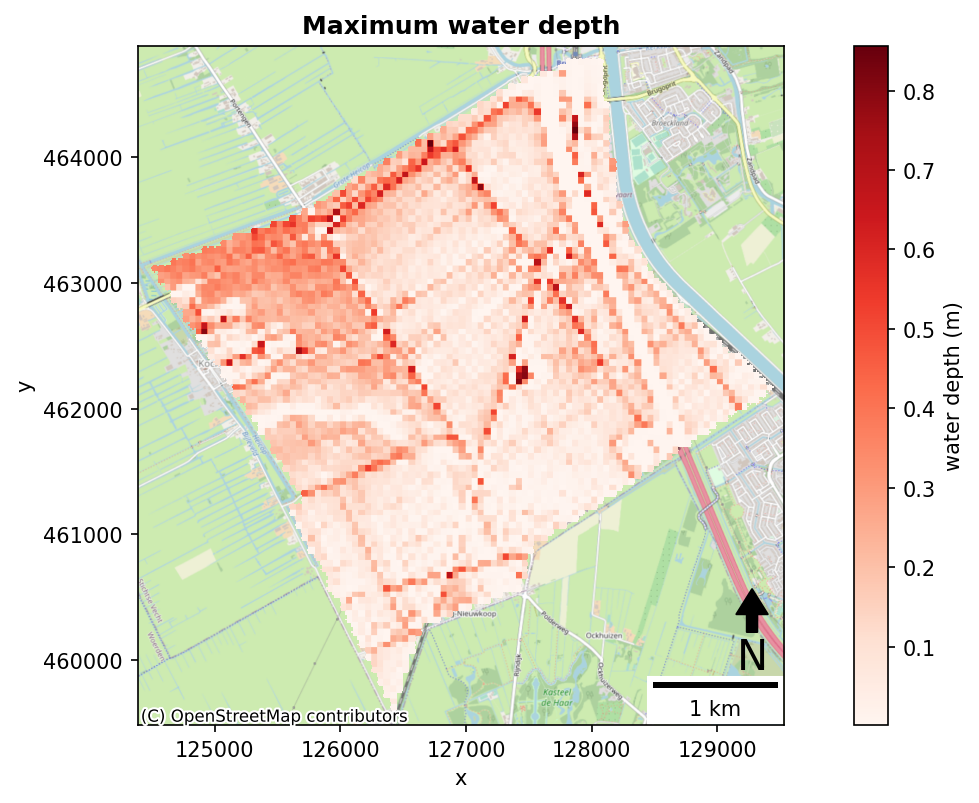

In [7]:
fig, ax = raster_plot_with_context(
    raster_path = output_file_path, 
    epsg = 28992, 
    clabel = "water depth (m)", 
    cmap = "Reds", 
    title = "Maximum water depth",
    )